# 2. DATA ANALYSIS AND VISUALISATION

In [30]:
# Importing the necessary libraries to clean the data.

import pandas as pd 
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from functools import reduce

In [31]:
DF = pd.read_csv('new_combined_cleaned_data.csv')
DF

/var/folders/_j/0x480n6d6r79_8qfp984ydxm0000gn/T/ipykernel_4015/3581881819.py:1: DtypeWarning: Columns (1,3,22,31) have mixed types. Specify dtype option on import or set low_memory=False.
  DF = pd.read_csv('new_combined_cleaned_data.csv')


,Unnamed: 0,accident_index,accident_year_x,accident_reference_x,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,...,vehicle_type,junction_location,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model
0,3,2021010287149,2021,10287149,1,2,2,3,01/01/2021,6,...,9,8,6,1,32,6,Large Engine cc,2,11,AUDI Q7
1,4,2021010287149,2021,10287149,1,2,2,3,01/01/2021,6,...,9,1,6,1,21,5,Medium Engine cc,1,11,VAUXHALL ASTRA
2,5,2021010287149,2021,10287149,1,2,2,3,01/01/2021,6,...,9,8,6,1,32,6,Large Engine cc,2,11,AUDI Q7
3,6,2021010287149,2021,10287149,1,2,2,3,01/01/2021,6,...,9,1,6,1,21,5,Medium Engine cc,1,11,VAUXHALL ASTRA
4,7,2021010287149,2021,10287149,1,2,2,3,01/01/2021,6,...,9,8,6,1,32,6,Large Engine cc,2,11,AUDI Q7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67928,155405,2021991047914,2021,991047914,99,2,2,3,21/05/2021,6,...,9,0,5,2,34,6,Medium Engine cc,2,17,VAUXHALL ASTRA
67929,155406,2021991047914,2021,991047914,99,2,2,3,21/05/2021,6,...,8,0,1,1,55,8,Large Engine cc,2,6,MERCEDES E CLASS
67930,155407,2021991047914,2021,991047914,99,2,2,3,21/05/2021,6,...,9,0,5,2,34,6,Medium Engine cc,2,17,VAUXHALL ASTRA
67931,155408,2021991047914,2021,991047914,99,2,2,3,21/05/2021,6,...,8,0,1,1,55,8,Large Engine cc,2,6,MERCEDES E CLASS


/var/folders/_j/0x480n6d6r79_8qfp984ydxm0000gn/T/ipykernel_4015/201280592.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = DF_CORR.corr().round(2)


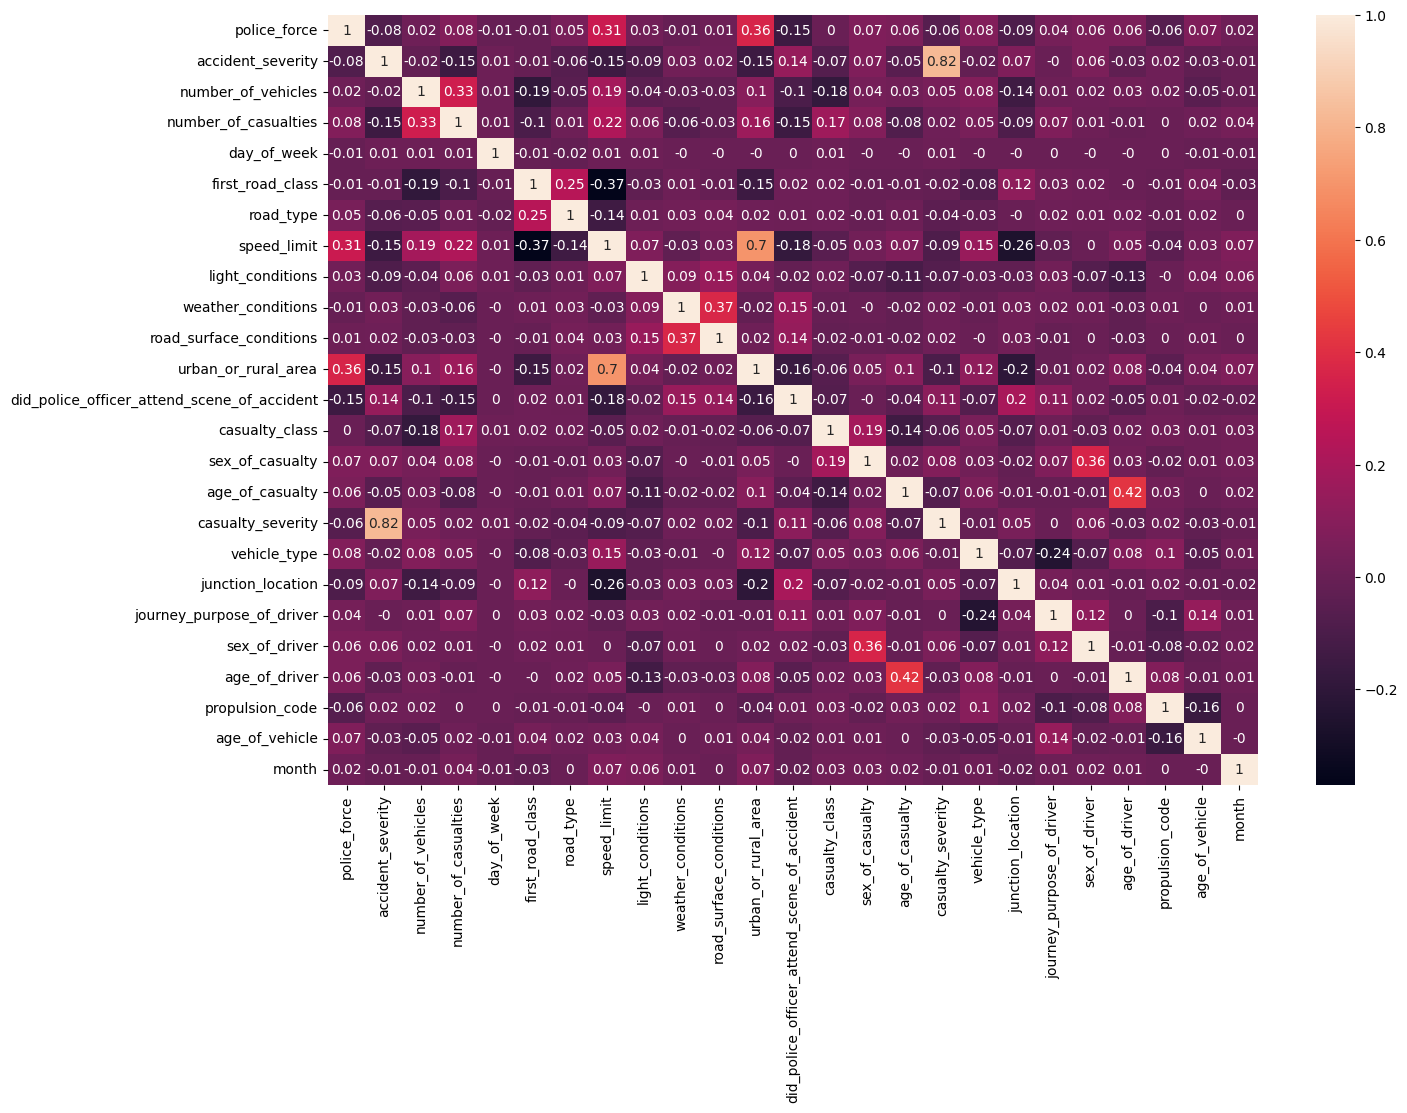

In [52]:
# Building a new data frame for the correlations matrix
DF_CORR = DF.drop(columns=['casualty_reference', 'accident_year_y', 'accident_year_x', 'vehicle_reference_y', 'vehicle_reference_x', 'age_band_of_driver', 'age_band_of_casualty', 'Unnamed: 0'])

# Plotting the correlation matrix
plt.figure(figsize = (15, 10))
correlation_matrix = DF_CORR.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

/var/folders/_j/0x480n6d6r79_8qfp984ydxm0000gn/T/ipykernel_4015/420407922.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(DF_CORR.corr())


<Figure size 640x480 with 0 Axes>

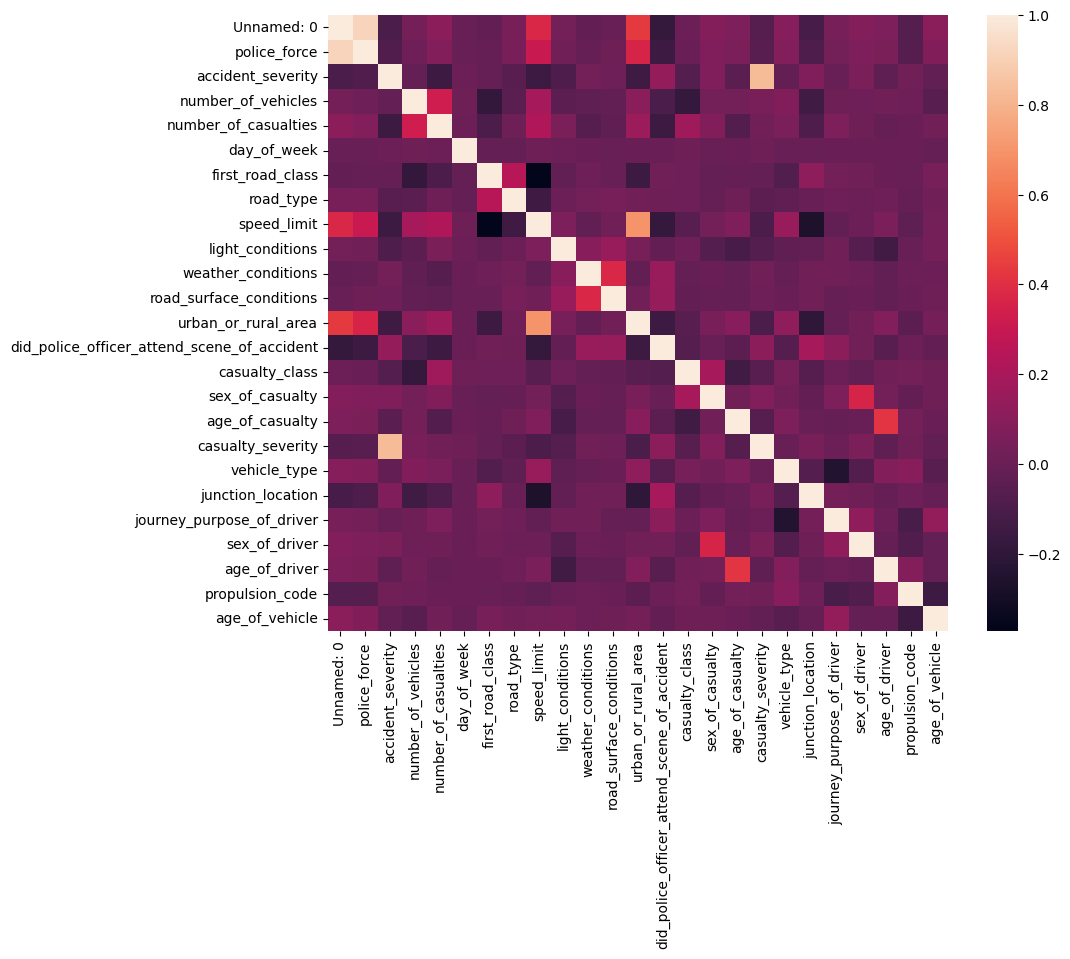

<Figure size 640x480 with 0 Axes>

In [34]:
# another way to visualise the correlations between all variables
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(DF_CORR.corr())
plt.figure()

How serious are these traffic accidents, looking at the accident_severity variable? 

In [35]:
# The count of accident severity
accident_severity_count = DF.accident_severity.value_counts()
accident_severity_count

3    52113
2    14336
1     1484
Name: accident_severity, dtype: int64

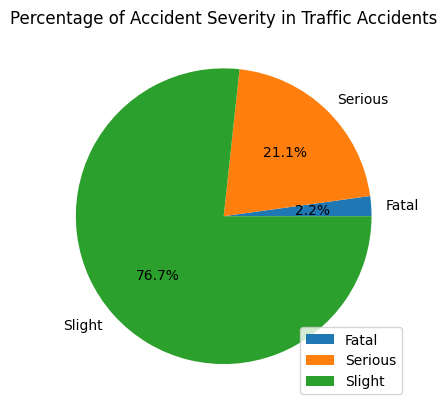

In [36]:
# Plotting the accident severity
fatal = accident_severity_count[1]
serious = accident_severity_count[2]
slight = accident_severity_count[3]

# Slices/ ratio
slices = [fatal,serious,slight]

# Labels
products = ["Fatal", "Serious", "Slight"]

#Pie
plt.pie(slices, labels = products,autopct='%1.1f%%')

# Other elements of pie
plt.legend(loc="lower right")
plt.title('Percentage of Accident Severity in Traffic Accidents')
plt.show()

What time periods have a higher likelihood of traffic accidents?

In [37]:
# The count of accidents per month
DF['month'] = pd.DatetimeIndex(DF['date']).month
month_count = DF.month.value_counts().sort_index()
month_count

/var/folders/_j/0x480n6d6r79_8qfp984ydxm0000gn/T/ipykernel_4015/3481621807.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  DF['month'] = pd.DatetimeIndex(DF['date']).month


1     4731
2     4661
3     5142
4     6629
5     6696
6     6087
7     6272
8     6493
9     6349
10    5217
11    5005
12    4651
Name: month, dtype: int64

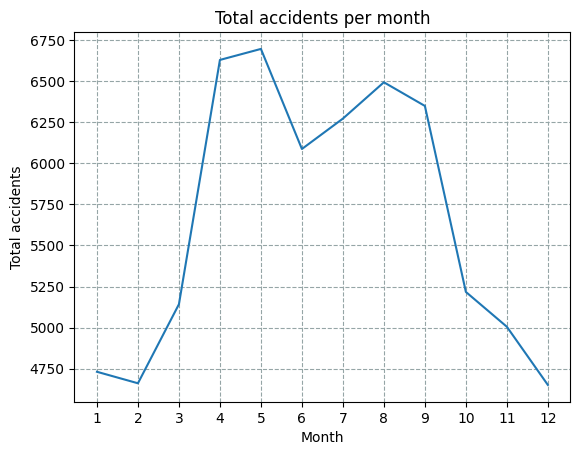

In [47]:
# Plotting the accidents per month
# line
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12], month_count)

# x-axis
plt.xlabel('Month')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])

# y-axis
plt.ylabel('Total accidents')

# other elements of the plot
plt.title('Total accidents per month')
plt.grid(color='#95a5a6', linewidth= 0.8, linestyle="--")
plt.show()

In [48]:
# The count of accidents per day of week
day_of_week_count = DF.day_of_week.value_counts().sort_index()
day_of_week_count

1     8216
2     9196
3     9207
4     9743
5     9989
6    11586
7     9996
Name: day_of_week, dtype: int64

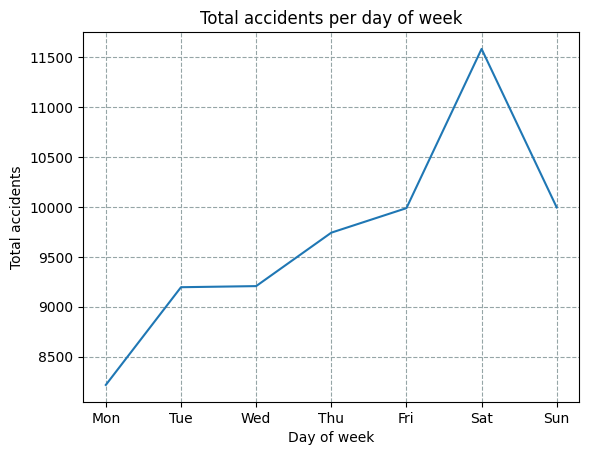

In [50]:
# Plotting the accidents per month
# line
plt.plot(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"], day_of_week_count)

# x-axis
plt.xlabel('Day of week')
plt.xticks(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])

# y-axis
plt.ylabel('Total accidents')

# other elements of the plot
plt.title('Total accidents per day of week')
plt.grid(color='#95a5a6', linewidth= 0.8, linestyle="--")
plt.show()

In [38]:
# this might not be needed?
'''
def casualty_sex(gender):
    if gender == 1:
        return "Male"
    if gender == 2:
        return "Female"
    else:
        return "Unknown"


DF['sex_of_casualty'] = DF['sex_of_casualty'].apply(casualty_sex)
'''

'\ndef casualty_sex(gender):\n    if gender == 1:\n        return "Male"\n    if gender == 2:\n        return "Female"\n    else:\n        return "Unknown"\n\n\nDF[\'sex_of_casualty\'] = DF[\'sex_of_casualty\'].apply(casualty_sex)\n'

In [41]:
# the count of casualty by gender
sex_of_casualty_count = DF.sex_of_casualty.value_counts()
sex_of_casualty_count

1    41381
2    26552
Name: sex_of_casualty, dtype: int64

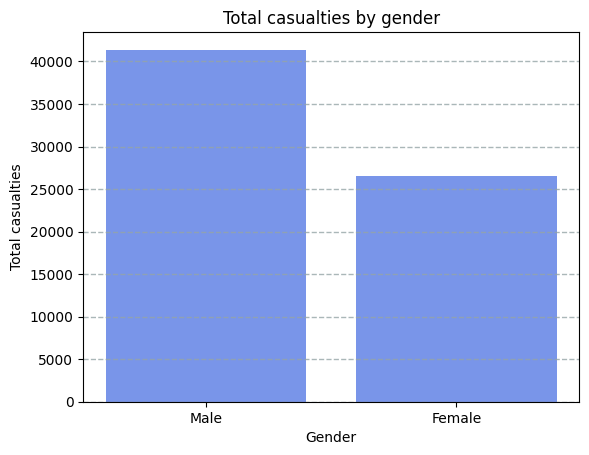

In [45]:
# visualising casualty by gender

plt.bar(["Male","Female"], sex_of_casualty_count, color='royalblue', alpha=0.7)
plt.xlabel('Gender')
plt.ylabel('Total casualties')
plt.title('Total casualties by gender')
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.8)

plt.show()

In [42]:
# the count of drivers involved by gender
sex_of_driver_count = DF.sex_of_driver.value_counts()
sex_of_driver_count

1    47668
2    20265
Name: sex_of_driver, dtype: int64

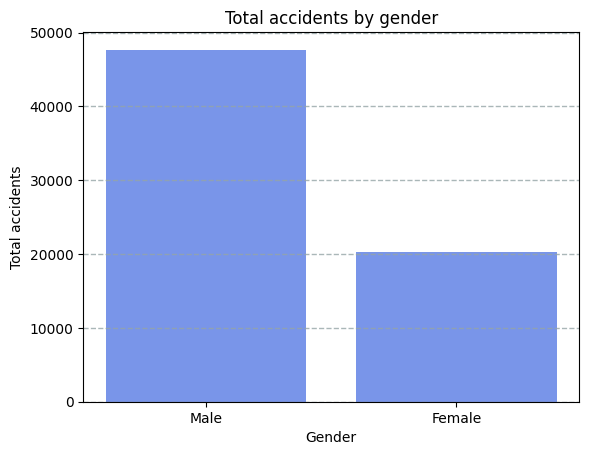

In [43]:
# visualising accidents by gender

plt.bar(["Male","Female"], sex_of_driver_count, color='royalblue', alpha=0.7)
plt.xlabel('Gender')
plt.ylabel('Total accidents')
plt.title('Total accidents by gender')
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.8)

plt.show()